In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from math import pi

from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

from scipy.optimize import minimize

In [2]:
import QNN

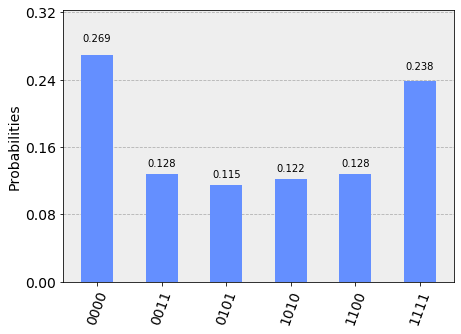

In [3]:
#First let's generate some data. Here we will use simple 4-pixel bars and stripes
# We can then compute the probability distribution corresponding to the data
data = QNN.generate_bars_and_stripes(length = 2, num_samples = 1000)
target = QNN.get_target(data)

plot_histogram(target)

In [4]:
# Now we can set how many qubits we want, the number of shots, and quantum backend to be used

n = 4
shots = 5000
backend = Aer.get_backend('qasm_simulator')

#Create instance of QuantumBornMachine object.
qbm = QNN.QuantumBornMachine(n, backend, shots, entangler = 'XX')

In [5]:
layers = 1
#numperlayer = 2*n             #For fully connected (unparameterized) CNOT entanglers
numperlayer = int(n*(n+3)/2)   #For fully connected (parameterized) XX entanglers
initial = np.random.uniform(0, 2*pi, size = numperlayer*layers)

qbm.build(initial, layers)

In [6]:
qbm.circ.draw()

1.1590539618528546


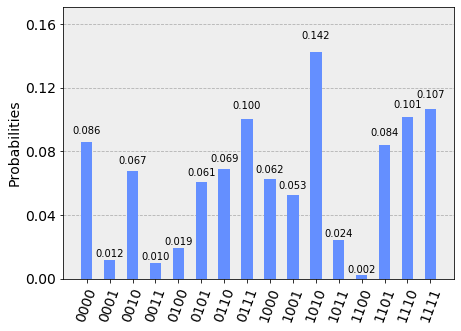

In [7]:
# Currently circuit is randomly parameterized
# We can check the distribution it produces and the initial cost

output = qbm.run()
cost = qbm.cost(target)
print(cost)
plot_histogram(output)

In [8]:
# Can directly check properties of the circuit
print(qbm.circ.depth())
print(qbm.circ.size())

18
30


In [9]:
# Now let's train against our target distribution
ret = qbm.train(target)
ret

{'params': array([3.2118366 , 2.45465724, 3.11419594, 6.69921661, 3.20582414,
        5.67087247, 3.0633898 , 6.46316581, 2.38565452, 2.33459306,
        4.63003404, 1.56858971, 3.98611529, 5.44782831]),
 'cost': 0.01097004114610516}

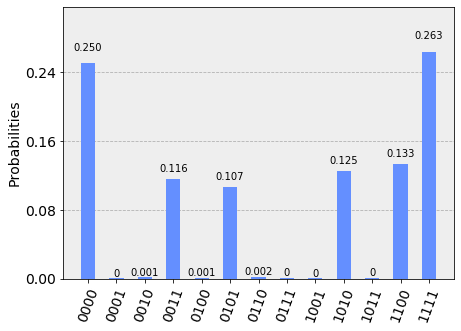

In [10]:
# Resulting distribution, which we see matches the target quite well
plot_histogram(qbm.learned)

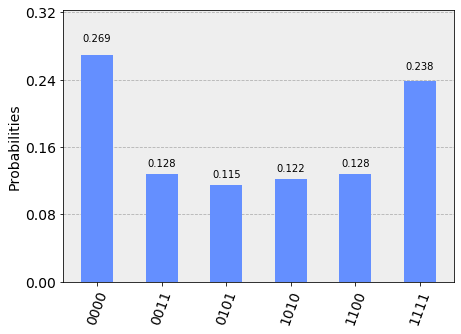

In [11]:
plot_histogram(target)